In [1]:
import numpy as np
from matplotlib import pyplot as plt
import utils_hugo as ut
from importlib import reload
reload(ut);

# Loading the data

In [39]:
n_samples = 10
seed=0

In [40]:
bids_dir = "/Users/hugofluhr/DATA/ds003505/"
subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-06', 'sub-07', 'sub-08', 'sub-09', 'sub-10', 'sub-11', ]
epochs_multi, y_multi = ut.multiple_subjects_epochs(bids_dir=bids_dir, subjects= subjects, tmin=-0.1, tmax=0.5, apply_proj=False, apply_baseline=False)
X, y, S = ut.aggregate_epochs(epochs_multi,y_multi, subjects)
del epochs_multi, y_multi
X_red, y_red, S_red = ut.reduce_trials(X, y, S, n_samples=n_samples, seed=seed)
del X, y, S

Picked 200 trials out of 5708


In [41]:
X_red.shape

(200, 128, 151)

# Compute Adjacencies

In [67]:
A = ut.compute_graphs_multi(X_red, ut.corr_coef_graph, False)

In [68]:
A.shape

(200, 128, 128)

In [69]:
A_bin = A.copy()
A_bin = A_bin.astype(bool).astype(int)

# Graph characterization

- number of nodes and edges/density
- degree distribution (+ moments?)
- path matrices not informative
- diameter
- CC
- assignment 1b : simulate network models to compare to

In [70]:
degrees_bin = A_bin.sum(axis=2)
degrees_bin.shape

(200, 128)

In [71]:
degrees_bin.mean(axis=0).shape

(128,)

In [72]:
# count cases of disconnected nodes
disc_graph_counts = 0
disc_nodes_counts = 0
for a in A_bin :
    d = a.sum(axis=0)
    disc_nodes_counts+=np.sum(d==0)
    disc_graph_counts+=np.any(d==0)

In [73]:
disc_graph_counts

200

In [74]:
disc_nodes_counts

200

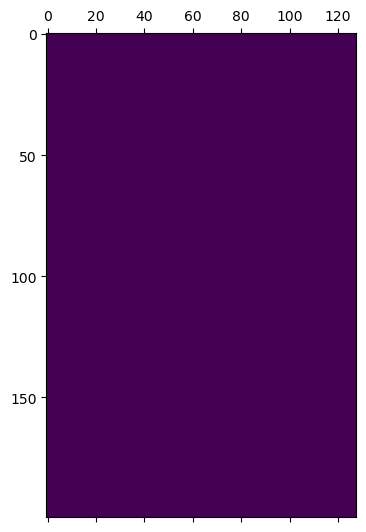

In [85]:
plt.matshow(A[:,:,0])

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 127.]),
 array([  0. ,  12.6,  25.2,  37.8,  50.4,  63. ,  75.6,  88.2, 100.8,
        113.4, 126. ]),
 <BarContainer object of 10 artists>)

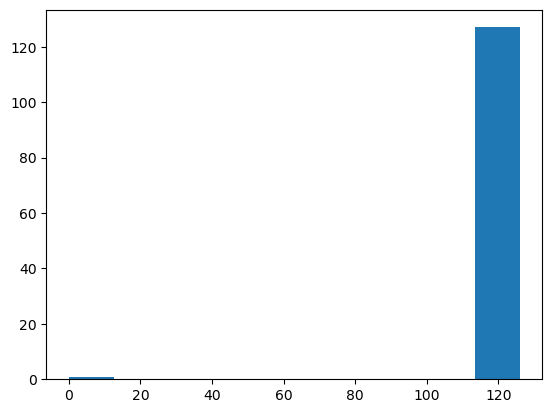

In [66]:
plt.hist(degrees_bin[0])


# Signal characterization

- spectral stuff?